# Credit Risk Prediction

Objective :
1. Membangun model prediktif menggunakan dataset yang diberikan yang dapat mengklasifikasikan calon peminjam menjadi dua kategori: disetujui (risiko rendah) dan ditolak (risiko tinggi).
2. Mengidentifikasi faktor-faktor atau fitur-fitur utama dalam dataset yang secara signifikan mempengaruhi penilaian risiko kredit.
3. Mengevaluasi kinerja model penilaian risiko kredit berdasarkan metrik evaluasi yang sesuai, seperti akurasi, presisi, recall, dan skor F1.

Problem Statement : 
Lending company di Indonesia ingin mengevaluasi risiko kredit yang terkait dengan para calon peminjam menggunakan dataset yang disediakan oleh perusahaan, yang terdiri dari data pinjaman yang disetujui dan ditolak. Dengan adanya prediksi risiko kredit maka perusahaan peminjaman dapat mengoptimalkan keputusan pemberian pinjaman, mengurangi risiko kerugian, meningkatkan efisiensi operasional, dan memperkuat posisi mereka di pasar, sehingga menciptakan dampak positif secara finansial dan operasional.


### load data

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
# load data
df = pd.read_csv('data/loan_data_2007_2014.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1652\3045304806.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/loan_data_2007_2014.csv')


In [3]:
# Mengatur jumlah maksimum kolom yang ditampilkan 
pd.set_option('display.max_columns', None)

In [4]:
# Melihat 5 data teratas
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Melihat informasi kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
# ukuran df
print('jumlah baris %d dan jumlah kolom %d' % df.shape)

jumlah baris 466285 dan jumlah kolom 75


### Handling Missing Value

In [7]:
print(f'Total missing value: ',df.isnull().sum().sum())

Total missing value:  9776224


In [8]:
# Menghapus kolom yang semua barisnya NaN
df = df.dropna(axis=1, how='all')

# Menampilkan ukuran kolom 
print(f'Jumlah kolom {df.shape[1]}')

Jumlah kolom 58


In [9]:
# cek duplicate data
df.duplicated().sum()

0

tidak ada data duplikat

In [10]:
# fungsi menghitung jumlah missing value setiap column
def show_missing(df):
    '''Calculate any missing value in every column.
    |parameter dataframe
    |return a dataframe with sorted data from the most missing values'''
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    percentage_missing = []
    # calculate every column (data type, row length, total unique value and NaN values)
    for item in df.columns: 
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        percentage_missing.append(str(round(df[item].isna().sum()/df.shape[0]*100,3))+'%')

    df_missing = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing,
        'percentage_missing' : percentage_missing
    })    
        
    return df_missing.sort_values('missing',ascending=False)

In [11]:
# menampilkan dataframe dengan jumlah missing value dan unique value
show_missing(df)

,variable,dtype,count,unique,missing,percentage_missing
30,mths_since_last_record,float64,466285,124,403647,86.567%
51,mths_since_last_major_derog,float64,466285,163,367311,78.774%
20,desc,object,466285,124437,340302,72.982%
29,mths_since_last_delinq,float64,466285,146,250351,53.691%
48,next_pymnt_d,object,466285,101,227214,48.729%
56,tot_cur_bal,float64,466285,220691,70276,15.071%
55,tot_coll_amt,float64,466285,6322,70276,15.071%
57,total_rev_hi_lim,float64,466285,14613,70276,15.071%
11,emp_title,object,466285,205476,27588,5.917%
12,emp_length,object,466285,12,21008,4.505%


Comment : 

`Kolom dengan jumlah unique 466285 (setara dengan jumlah data-point) akan dihapus. Karena feature ini terlalu bervariasi nilainya.`

`Kolom dengan unique value 1 akan dihapus.`

`Kolom dengan missing value >= 50% akan dihapus.`

`Kolom yang termasuk target leakage akan dihapus.`

`Missing value akan diisi setelah statistic analysis.`

In [12]:
# Menghapus kolom dengan missing value >= 50%
# Namun kolom mths_since_last_delinq tidak akan dihilangkan karena merupakan feature yang penting dalam model machine learning
df.drop(columns=['mths_since_last_record','mths_since_last_major_derog','desc'], inplace=True)

In [13]:
# Menghapus kolom target leakage
df.drop(columns=['recoveries','out_prncp','out_prncp_inv', 'total_pymnt','total_pymnt_inv','total_rec_int', 'total_rec_prncp',
                 'total_rec_late_fee','last_pymnt_d', 'last_pymnt_amnt','next_pymnt_d','revol_util','revol_bal','tot_cur_bal'], inplace=True)

In [14]:
# menghapus kolom yang tidak relevan untuk model machine learning
df.drop(columns=['Unnamed: 0', 'id','member_id', 'emp_title', 'url', 'zip_code','addr_state', 'title', 'policy_code','last_credit_pull_d'],inplace=True)

### statistik deskriptif

In [15]:
# melihat statistika deskriptif
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.00,12000.00,20000.00,35000.00
funded_amnt,466285.0,14291.801044,8274.371300,500.00,8000.00,12000.00,20000.00,35000.00
funded_amnt_inv,466285.0,14222.329888,8297.637788,0.00,8000.00,12000.00,19950.00,35000.00
int_rate,466285.0,13.829236,4.357587,5.42,10.99,13.66,16.49,26.06
installment,466285.0,432.061201,243.485550,15.67,256.69,379.89,566.58,1409.99
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.00,63000.00,88960.00,7500000.00
dti,466285.0,17.218758,7.851121,0.00,11.36,16.87,22.78,39.99
delinq_2yrs,466256.0,0.284678,0.797365,0.00,0.00,0.00,0.00,29.00
inq_last_6mths,466256.0,0.804745,1.091598,0.00,0.00,0.00,1.00,33.00
mths_since_last_delinq,215934.0,34.104430,21.778487,0.00,16.00,31.00,49.00,188.00


In [16]:
def unique_and_value_count(df):
    '''function for calculate how many unique value in column and value count of every unique
    |parameter dataframe'''

    col_names=[col for col in df.columns if df[col].dtype == "object"]
    columns_category = []
    
    for col in col_names:
        if df[col].nunique() < 15: # unique less than 15
            print('Unique   ',len(df[col].unique()))
            print(df[col].value_counts())
            print("--"*10)
            columns_category.append(col)
    return columns_category

In [17]:
# Analisis Variabel univariat
# distribusi category setiap kolom
columns_category = unique_and_value_count(df)

Unique    2
 36 months    337953
 60 months    128332
Name: term, dtype: int64
--------------------
Unique    7
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64
--------------------
Unique    12
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64
--------------------
Unique    6
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64
--------------------
Unique    3
Verified           168055
Source Verified    149993
Not Verified       148237
Name: verification_status, dtype: int64
--------------------
Unique    9
Current                                                224226
Fully Paid                                             184739
Cha

`Kolom payment plan(pymnt_plan) terdapat dua kategori y/n dengan jumlah yang sangat tidak seimbang. Dari hasil pertimbangan diyakini bahwa kolom ini akan di drop.`

`KOlom application_type juga akan dihapus karena hanya ada 1 unique value. Kolom ini tidak akan mempengaruhi classification loan.`

In [18]:
# menghapus kolom yang memilki unique value 1 dan kolom yang unique value hanya 2 dan nilainya sangat tidak seimbang.
df.drop(columns=['pymnt_plan','application_type'], inplace=True)

#### Cek Correlation

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1652\4227544739.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1652\4227544739.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')


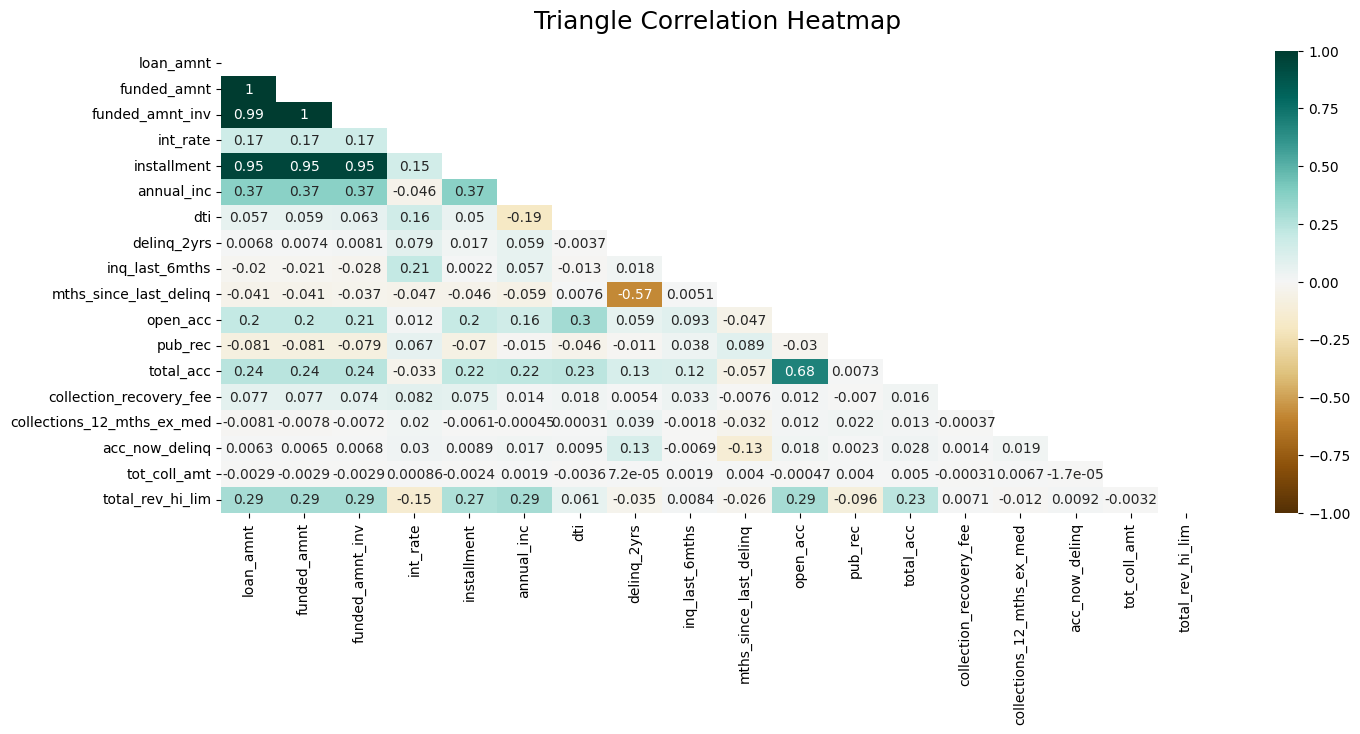

In [19]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

plt.show()

<Axes: xlabel='mths_since_last_delinq', ylabel='delinq_2yrs'>

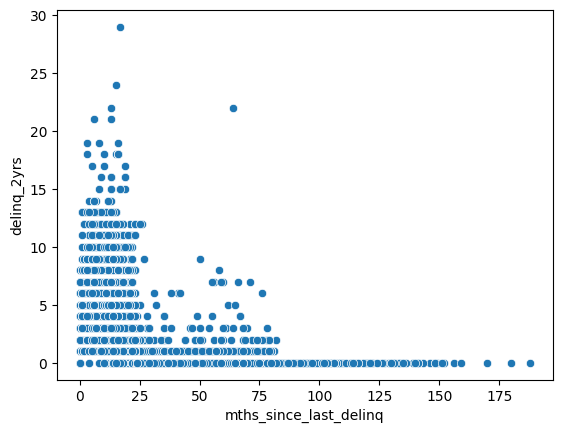

In [20]:
sns.scatterplot(x='mths_since_last_delinq',y='delinq_2yrs', data=df)

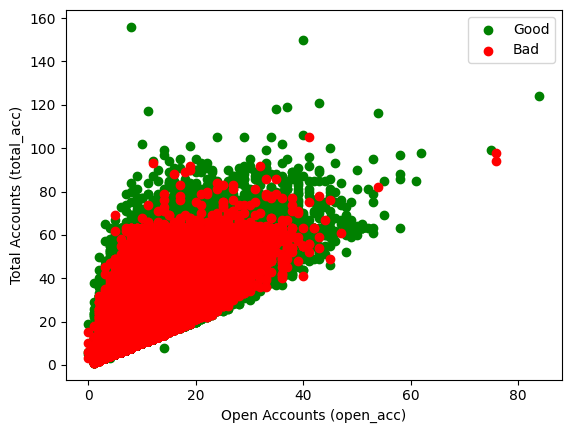

In [21]:
# Cek korelasi antara open_acc, total_acc dengan loan_status

target_good = ['Current','Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
target_bad = ['Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)','Default', 'Does not meet the credit policy. Status:Charged Off']

# Memisahkan data berdasarkan target
open_acc_good = [df['open_acc'][i] for i in range(len(df.loan_status)) if df['loan_status'][i] in target_good]
total_acc_good = [df['total_acc'][i] for i in range(len(df.loan_status)) if df['loan_status'][i] in target_good]
open_acc_bad = [df['open_acc'][i] for i in range(len(df.loan_status)) if df['loan_status'][i] in target_bad]
total_acc_bad = [df['total_acc'][i] for i in range(len(df.loan_status)) if df['loan_status'][i] in target_bad]

# Membuat scatter plot
plt.scatter(open_acc_good, total_acc_good, color='green', label='Good')
plt.scatter(open_acc_bad, total_acc_bad, color='red', label='Bad')

# Memberikan label sumbu x dan y
plt.xlabel('Open Accounts (open_acc)')
plt.ylabel('Total Accounts (total_acc)')

# Menambahkan legenda
plt.legend()

# Menampilkan scatter plot
plt.show()


total_acc dan open_acc memilki nilai korelasi 0.68(korelasi positif yang tinggi).

Berdasarkan scatter plot tersebut bahwa `open_acc yang tinggi akan cenderung memiliki credit score yang baik`. Maka kolom total_acc akan dihapus.

In [22]:
# fungsi untuk menghitung korelasi kategori
def corr_category(col_1,col_2):
    '''Fungsi untuk menghitung Korelasi Kontingensi (Cramer's V)
    |parameter col_1 dan col_2 merupakan kolom yang akan diuji koefisien korelasinya
    '''
    # Membuat tabel kontingensi dari kolom "sub_grade" dan "grade"
    contingency_table = pd.crosstab(col_1, col_2)

    # Menghitung korelasi kontingensi dengan menggunakan koefisien Cramer's V
    def cramers_v(table):
        chi2 = chi2_contingency(table)[0]
        n = table.sum().sum()
        phi2 = chi2 / n
        r, k = table.shape
        phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
        rcorr = r - ((r - 1) ** 2) / (n - 1)
        kcorr = k - ((k - 1) ** 2) / (n - 1)
        return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

    cramer_v = cramers_v(contingency_table)
    print("Koefisien Korelasi Kontingensi (Cramer's V):", cramer_v)

In [23]:
corr_category(df['loan_status'], df['grade'])
corr_category(df['loan_status'], df['sub_grade'])

Koefisien Korelasi Kontingensi (Cramer's V): 0.08456808878714443
Koefisien Korelasi Kontingensi (Cramer's V): 0.07744503419954547


Karena kolom grade memiliki korelasi yang lebih tinggi terhadap kolom target maka, `kolom sub_grade yang akan dihilangkan.`

In [24]:
# Menghapus kolom multikolinearitas dengan kolom loan_amnt.
# total_rev_hi_lim berkorelasi positif terhadap revol_bal. revol_bal dipertahankan karena tidak memiliki null value.
df.drop(columns=['funded_amnt', 'funded_amnt_inv','installment','total_rev_hi_lim','total_acc','collection_recovery_fee','sub_grade'], inplace=True)

#### annual-income

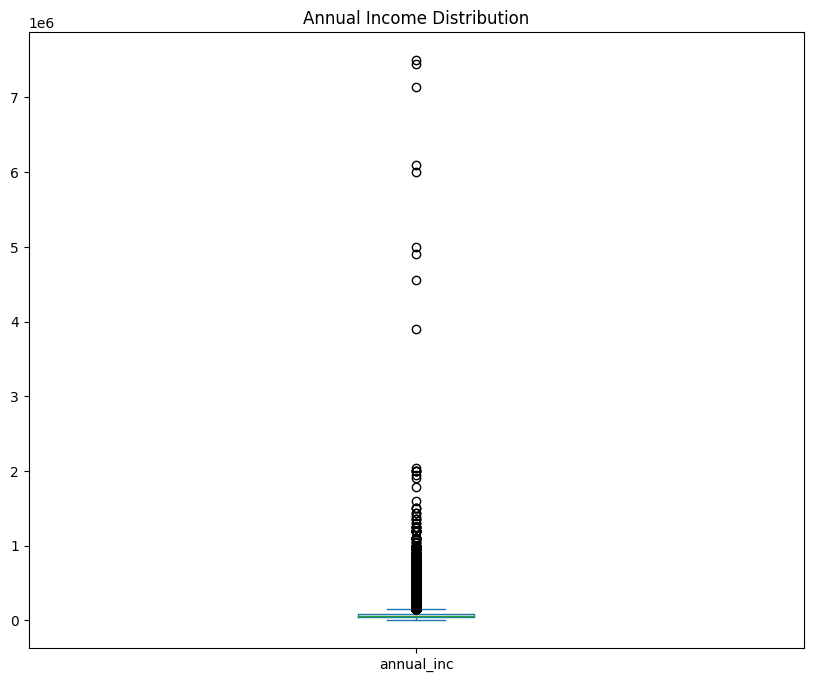

In [25]:
# Plot a box-whisker chart
df['annual_inc'].plot(kind='box', title="Annual Income Distribution", figsize=(10,8))
plt.show()

In [26]:
# Menghitung skewness menggunakan pandas
skewness = df['annual_inc'].skew()
print('Skewness:', skewness)

Skewness: 29.568905376722288


skew > 1 (sangat condong kekanan)

In [27]:
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3-Q1
# menghitung upper boundary for extreme skewed
upper_boundary = Q3 + (3 * IQR)
lower_boundary = Q1 - (3 * IQR)
print(f'Batas bawah annual income:{lower_boundary}\nBatas atas annual income: {upper_boundary}')

Batas bawah annual income:-86880.0
Batas atas annual income: 220840.0


In [28]:
# Melihat jumlah data-point outliers berdasarkan loan_status
df[df['annual_inc']>upper_boundary]['loan_status'].value_counts()

Current                                                3253
Fully Paid                                             2338
Charged Off                                             334
Late (31-120 days)                                       76
Does not meet the credit policy. Status:Fully Paid       59
In Grace Period                                          42
Does not meet the credit policy. Status:Charged Off      21
Late (16-30 days)                                        14
Default                                                   8
Name: loan_status, dtype: int64

Kebanyakan outliers berasal dari loan_status Fully Paid dan Current.

`Ini membuktikan bahwa outliers dapat dihilangkan.`

In [29]:
# ambil index load_weight yang lebih besar dari upper_boundary atau lebih kecil dari lower_boundary
filtered_values = df[(df['annual_inc'] > upper_boundary) | (df['annual_inc'] < lower_boundary)].index

In [30]:
# menghapus Outliers annual_inc
df.drop(filtered_values, inplace=True)

In [31]:
# melihat data-point missing value dari annual_inc
df[df.annual_inc.isnull()]

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt
42449,5000,36 months,7.43,A,< 1 year,NONE,NaN,Not Verified,Aug-07,Does not meet the credit policy. Status:Fully ...,other,1.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
42450,7000,36 months,7.75,A,< 1 year,NONE,NaN,Not Verified,Aug-07,Does not meet the credit policy. Status:Fully ...,other,1.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
42480,6700,36 months,7.75,A,< 1 year,NONE,NaN,Not Verified,Jul-07,Does not meet the credit policy. Status:Fully ...,other,1.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
42533,6500,36 months,8.38,A,< 1 year,NONE,NaN,Not Verified,Jun-07,Does not meet the credit policy. Status:Fully ...,other,4.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN


Ternyata keempat data-point termasuk kategori "Does not meet the credit policy. Status:Fully paid" sehingga `missing value ini akan dihilangkan saja.`

In [32]:
# Menghapus baris dengan nilai null pada kolom 'annual_inc'
df.dropna(subset=['annual_inc'], inplace=True)

In [33]:
df.shape

(460136, 22)

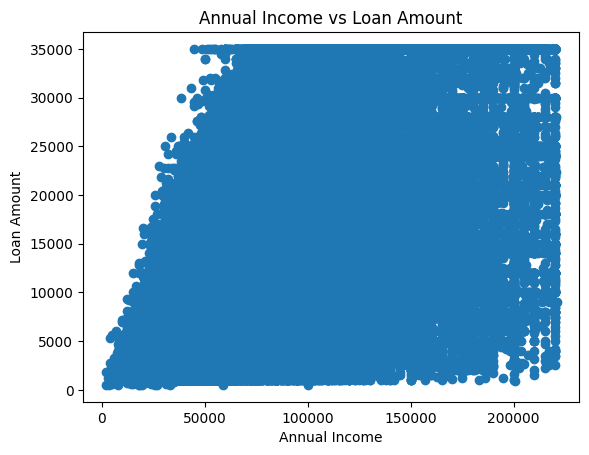

In [34]:
# Membuat scatter plot antara loan_amnt dengan annual_inc
plt.scatter(df['annual_inc'], df['loan_amnt'])

# Memberikan label pada sumbu x dan y serta judul plot
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Annual Income vs Loan Amount')

# Menampilkan plot
plt.show()

In [35]:
df.annual_inc.corr(df.loan_amnt)

0.47577092770444585

Hubungan antara annual income dengan loan amount termasuk korelasi `positif yang sedang`. 

Member dengan pendapatan yang tinggi memungkinkan melakukan peminjaman yang tinggi.

#### emp_length (lama kerja)

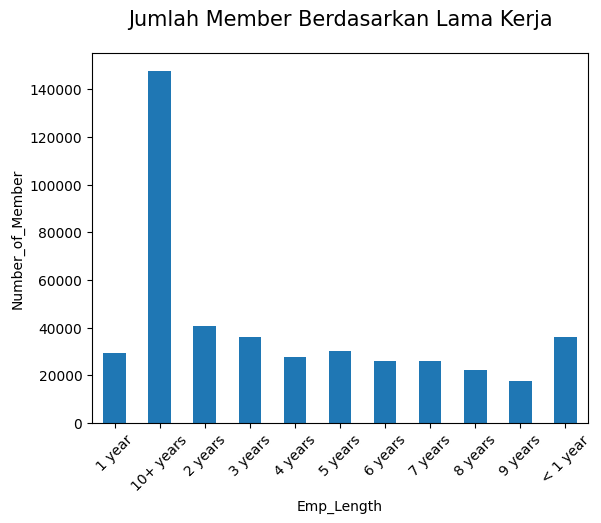

In [36]:
df.groupby('emp_length')['emp_length'].count().plot(kind='bar')
plt.title('Jumlah Member Berdasarkan Lama Kerja', pad=20, fontsize=15)
plt.ylabel('Number_of_Member')
plt.xlabel('Emp_Length')
plt.xticks(rotation=45)
plt.show()

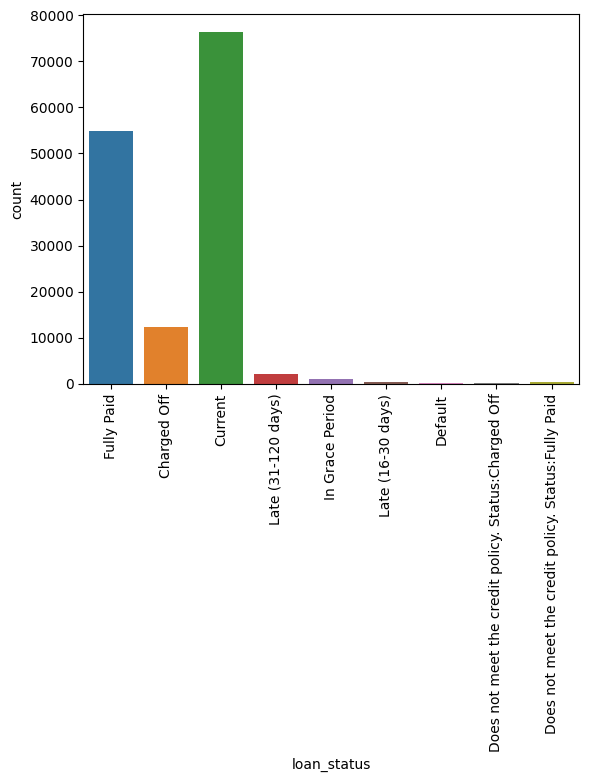

In [37]:
# Mengambil data emp_length 10+ years
emp_lenth_10 = df[df['emp_length']=='10+ years']

# Membuat countplot
sns.countplot(data= emp_lenth_10, x=emp_lenth_10['loan_status'])
plt.xticks(rotation=90)
plt.show()

`10+ years(data member_id paling banyak) tersebar pada beberapa loan_status, baik fully paid, current dan charged off.`

In [38]:
# Jumlah missing value kolom emp_length berdasarkan loan_status
df[df['emp_length'].isnull()].groupby('loan_status')['loan_status'].count()

loan_status
Charged Off                                             2317
Current                                                11648
Default                                                   48
Does not meet the credit policy. Status:Charged Off       15
Does not meet the credit policy. Status:Fully Paid        19
Fully Paid                                              6337
In Grace Period                                          102
Late (16-30 days)                                         69
Late (31-120 days)                                       400
Name: loan_status, dtype: int64

In [39]:
# Mengambil modus dari kolom 'emp_length' berdasarkan 'loan_status'
mode_emp_length = df.groupby('loan_status')['emp_length'].apply(lambda x: x.mode()[0])
mode_emp_length

loan_status
Charged Off                                            10+ years
Current                                                10+ years
Default                                                10+ years
Does not meet the credit policy. Status:Charged Off    10+ years
Does not meet the credit policy. Status:Fully Paid      < 1 year
Fully Paid                                             10+ years
In Grace Period                                        10+ years
Late (16-30 days)                                      10+ years
Late (31-120 days)                                     10+ years
Name: emp_length, dtype: object

Secara keseluruhan maka setiap loan_status modusnya adalah '10+ years' maka missing value akan diisi '10+ years'.

In [40]:
# Mengisi nilai yang hilang dengan modus
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace=True)

#### mths_since_last_delinq

In [41]:
df[df.mths_since_last_delinq.isnull()].loan_status.value_counts()

Current                                                113945
Fully Paid                                             103252
Charged Off                                             23507
Late (31-120 days)                                       3281
In Grace Period                                          1421
Does not meet the credit policy. Status:Fully Paid        867
Late (16-30 days)                                         531
Default                                                   420
Does not meet the credit policy. Status:Charged Off       288
Name: loan_status, dtype: int64

In [42]:
# Mengisi nilai hilang dengan median dari masing-masing loan_status
median_per_loan_status = df.groupby('loan_status')['mths_since_last_delinq'].median()

def fillna_mths_since_last_delinq(row):
    if pd.isnull(row['mths_since_last_delinq']):
        return median_per_loan_status[row['loan_status']]
    return row['mths_since_last_delinq']

df['mths_since_last_delinq'] = df.apply(fillna_mths_since_last_delinq, axis=1)

#### earliest_cr_line & issue_d

In [43]:
# function digunakan untuk convert issue_d dan earliest_cr_line menjadi year-month format
def ubahDateTime(col, maxYear):
    # Mengubah kolom menjadi tipe data datetime
    col = pd.to_datetime(col, format='%b-%y')

    # Mengatur tahun dengan dua digit menjadi interpretasi yang diinginkans
    col = col.apply(lambda x: x.replace(year=x.year - 100) if x.year > maxYear else x)

    col = pd.to_datetime(col, format='%b-%y').dt.to_period('M')

    return col

In [44]:
df['earliest_cr_line'] = ubahDateTime(df['earliest_cr_line'], 2023)

df['issue_d'] = ubahDateTime(df['issue_d'], 2023)

In [45]:
# Menghitung perbedaan bulan yang memperhitungkan tahun antara kedua kolom
df['month_difference'] = ((df['issue_d'].dt.year - df['earliest_cr_line'].dt.year) * 12) + (df['issue_d'].dt.month - df['earliest_cr_line'].dt.month)

In [46]:
df['month_difference'].describe()

count    460136.000000
mean        191.789634
std         193.561390
min           6.000000
25%         132.000000
50%         174.000000
75%         234.000000
max       24105.000000
Name: month_difference, dtype: float64

Dilihat dari range min-max, terlihat perbedaan yang sangat signifikan. nilai max juga jauh dari q3, kemungkinan kolom ini terlalu skew kekanan.

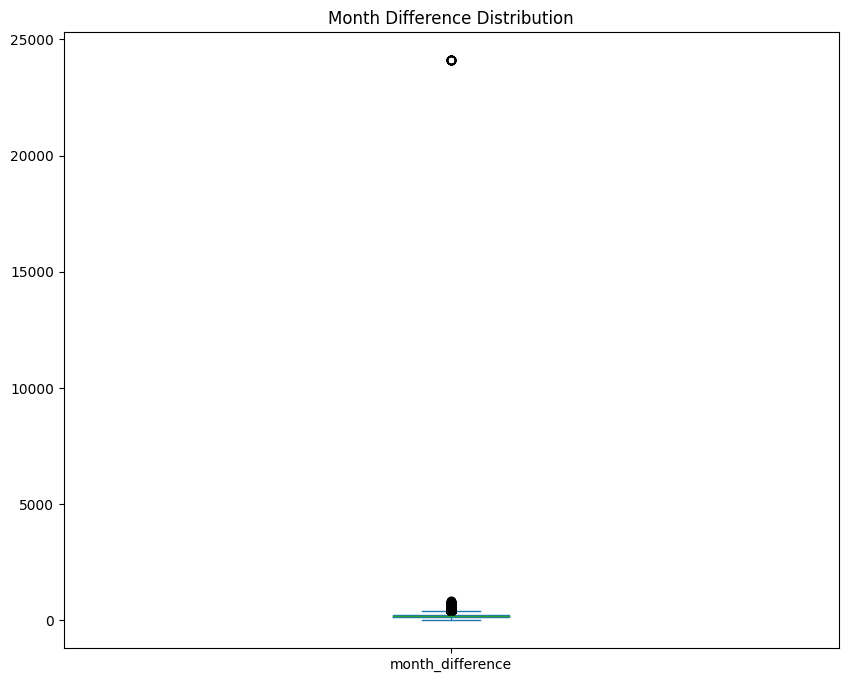

In [47]:
# Plot a box-whisker chart
df['month_difference'].plot(kind='box', title="Month Difference Distribution", figsize=(10,8))
plt.show()

In [48]:
# Menghitung skewness menggunakan pandas
skewness = df['month_difference'].skew()
print('Skewness:', skewness)

Skewness: 98.42693948090161


In [49]:
Q1 = df['month_difference'].quantile(0.25)
Q3 = df['month_difference'].quantile(0.75)
IQR = Q3-Q1
# menghitung upper boundary for extreme skewed
upper_boundary = Q3 + (3 * IQR)
lower_boundary = Q1 - (3 * IQR)
print(f'Batas bawah annual income:{lower_boundary}\nBatas atas annual income: {upper_boundary}')

Batas bawah annual income:-174.0
Batas atas annual income: 540.0


In [50]:
df[df.month_difference > 540]

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,month_difference
1580,21000,36 months,7.51,A,10+ years,MORTGAGE,49200.0,Verified,2011-12,Fully Paid,credit_card,27.02,0.0,1962-09,1.0,33.0,8.0,0.0,f,0.0,0.0,NaN,591
2799,5200,60 months,8.90,A,10+ years,RENT,36000.0,Source Verified,2011-11,Late (16-30 days),vacation,8.17,0.0,1964-09,0.0,26.0,6.0,0.0,f,0.0,0.0,NaN,566
3989,5000,36 months,6.03,A,10+ years,OWN,25000.0,Verified,2011-11,Fully Paid,debt_consolidation,29.86,0.0,1963-12,0.0,33.0,12.0,0.0,f,0.0,0.0,NaN,575
4492,6000,36 months,6.03,A,10+ years,MORTGAGE,96000.0,Not Verified,2011-10,Fully Paid,car,23.80,0.0,1963-03,0.0,33.0,11.0,0.0,f,0.0,0.0,NaN,583
5417,15000,36 months,6.03,A,10+ years,RENT,84000.0,Verified,2011-10,Fully Paid,debt_consolidation,6.43,0.0,1965-11,1.0,33.0,17.0,0.0,f,0.0,0.0,NaN,551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464003,3650,36 months,16.24,C,10+ years,MORTGAGE,46000.0,Verified,2014-01,Current,credit_card,9.91,0.0,1968-01,2.0,50.0,8.0,0.0,f,0.0,0.0,150.0,552
464260,22500,36 months,6.62,A,4 years,RENT,50000.0,Verified,2014-01,Fully Paid,debt_consolidation,25.66,0.0,1966-07,1.0,33.0,16.0,0.0,f,0.0,0.0,0.0,570
465100,14000,36 months,9.67,B,7 years,MORTGAGE,80100.0,Not Verified,2014-01,Current,credit_card,11.69,1.0,1967-10,0.0,7.0,22.0,0.0,f,0.0,0.0,0.0,555
465500,2500,36 months,19.22,D,10+ years,MORTGAGE,34908.0,Source Verified,2014-01,Charged Off,major_purchase,16.71,0.0,1967-09,1.0,52.0,9.0,0.0,f,0.0,0.0,0.0,556


Ada 1155 baris yang nilai month_difference terindikasi sebagai outliers. Maka outliers akan dihilangkan saja.

In [51]:
# ambil index load_weight yang lebih besar dari upper_boundary atau lebih kecil dari lower_boundary
filtered_values = df[(df['month_difference'] > upper_boundary) | (df['month_difference'] < lower_boundary)].index

# menghapus Outliers annual_inc
df.drop(filtered_values, inplace=True)

#### drop

In [52]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'initial_list_status', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'month_difference'],
      dtype='object')

In [53]:
# Menghapus kolom yang tidak relevan untuk model machine learning setelah analisis deskriptif
df.drop(columns=['issue_d','earliest_cr_line'], inplace=True)

In [54]:
df.loan_status.value_counts()

Current                                                220285
Fully Paid                                             182105
Charged Off                                             42031
Late (31-120 days)                                       6801
In Grace Period                                          3101
Does not meet the credit policy. Status:Fully Paid       1904
Late (16-30 days)                                        1198
Default                                                   820
Does not meet the credit policy. Status:Charged Off       736
Name: loan_status, dtype: int64

In [55]:
df.isnull().sum().sum()

69468

In [56]:
df.tot_coll_amt.fillna(0, inplace=True)

In [57]:
df[df.collections_12_mths_ex_med.isnull()].loan_status.value_counts()

Fully Paid                                             48
Does not meet the credit policy. Status:Fully Paid     40
Does not meet the credit policy. Status:Charged Off    17
Charged Off                                             6
Name: loan_status, dtype: int64

In [58]:
df.dropna(subset='collections_12_mths_ex_med',inplace=True)

In [59]:
df.isnull().sum().sum()

0

`Tidak ada missing value.`

#### Mengganti nilai target

In [60]:
# Menjadikan target menjadi boolean 0 dan 1
# 1 mengindikasikan bahwa credit score 'good'
# 0 mengindikasikan bahwa credit score 'bad'
df['loan_status'] = df['loan_status'].replace(['Current', 'Fully Paid','Does not meet the credit policy. Status:Fully Paid'], 1)
df['loan_status'] = df['loan_status'].replace(['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default','Does not meet the credit policy. Status:Charged Off'], 0)

In [61]:
df.reset_index(drop=True, inplace=True)

#### EDA

##### Grade

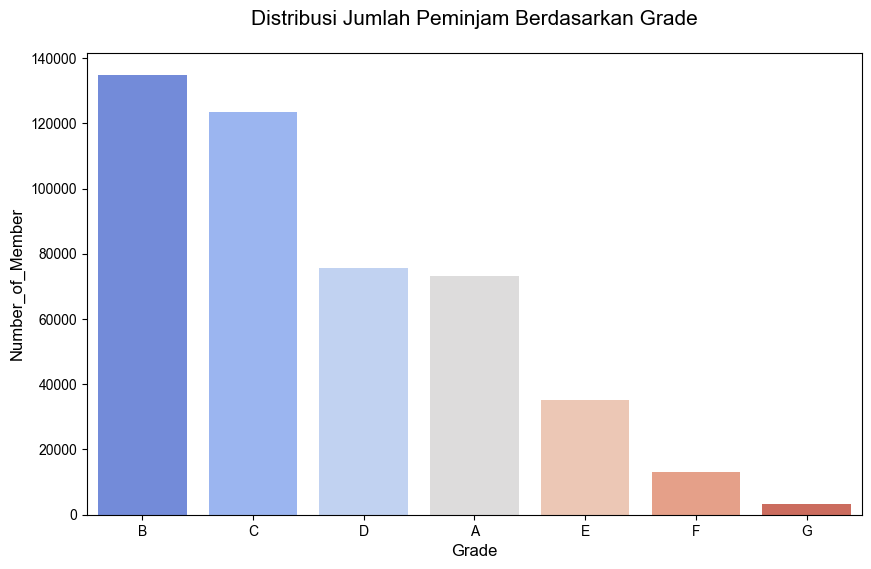

In [62]:
# mengurutkan grade dari yang terbanyak
category_order = df['grade'].value_counts().index

# Visualisasi Data grade
plt.figure(figsize=(10, 6))
sns.countplot(df, x='grade',order=category_order, palette ='coolwarm')
sns.set_style('darkgrid')
plt.title("Distribusi Jumlah Peminjam Berdasarkan Grade", pad=20, fontsize=15)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number_of_Member', fontsize=12)
plt.show()

`Sebagian besar member tergolong grade B, diikuti oleh grade C, dan jumlah member dengan grade G sangat sedikit.`

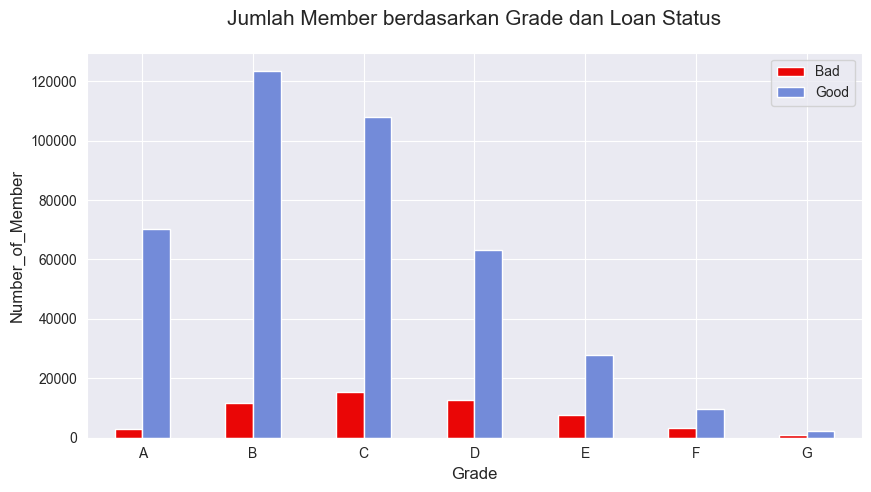

In [63]:
# Membuat figure dan axes dengan ukuran 20x10
fig, ax = plt.subplots(figsize=(10, 5))

# Melakukan grouping dan plotting menggunakan pandas plot
df.groupby(['loan_status', 'grade'])['grade'].count().unstack(level=0).plot(kind='bar', ax=ax, color=['#ea0606','#738BD9'])

plt.title('Jumlah Member berdasarkan Grade dan Loan Status', pad=20, fontsize=15)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number_of_Member', fontsize=12)
plt.legend(['Bad','Good'])
plt.xticks(rotation=0)

# Menampilkan plot
plt.show()

'Good' credit risk paling banyak terdapat pada member dengan grade B, sekitar 123373 members.

Sedangkan 'Bad' credit risk paling banyak terdapat pada member dengan grade C, sekitar 15469 members.

##### Loan amount

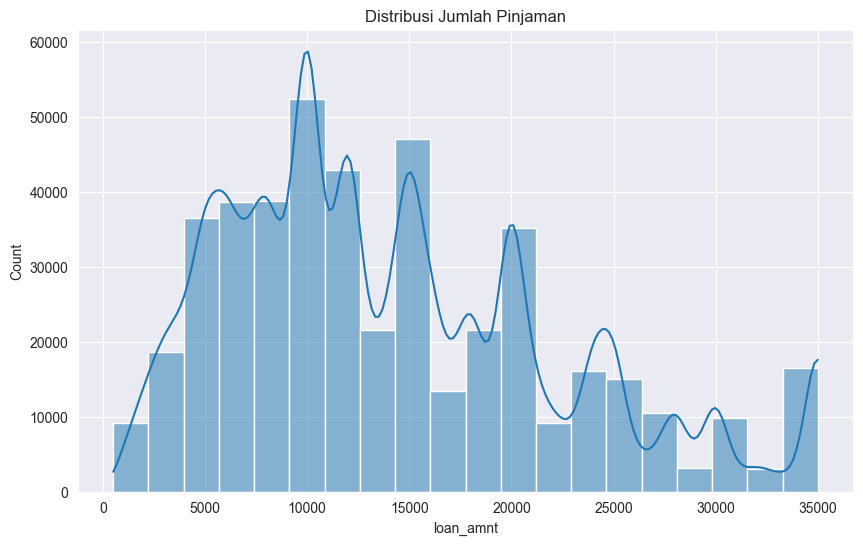

In [64]:
# Visualisasi Data loan amount
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], bins=20, kde=True)
plt.title("Distribusi Jumlah Pinjaman")
plt.show()

In [65]:
df.loan_amnt.describe()

count    458870.000000
mean      14181.603559
std        8186.558196
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

Dari data terlihat rata-rata pinjaman 14181 dengan standar deviasi 8186. Ini menunjukan sebagian besar pinjaman berada dalam kisaran sekitar 5995 hingga 22367.Fakta ini disebut juga satu standard deviasi dari rata-rata.
Sekitar 68.26% data jatuh pada kisaran nilai tersebut.

`Sebagian besar pinjaman berada disekitar 12.000(median).`

##### Loan Status

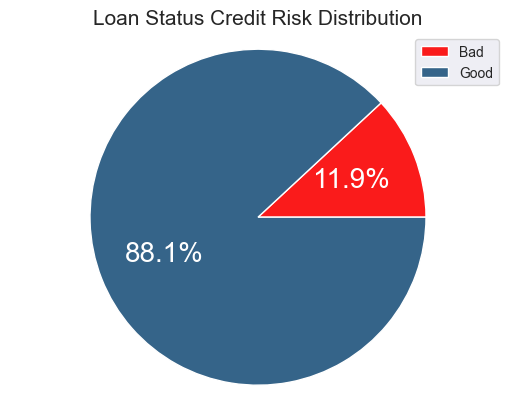

In [66]:
# Create a pie chart
df.groupby("loan_status")['loan_status'].count().plot(kind='pie', autopct='%1.1f%%', colors=['#FA1B1B','#356489'], textprops={'fontsize': 20,'color':'white'})

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Loan Status Credit Risk Distribution', fontsize=15)

plt.ylabel('')
plt.legend(['Bad','Good'])

# Display the chart
plt.show()

kolom loan_status akan dijadikan target model machine learning. 

Dari grafik terlihat bahwa data imbalance,dimana status 'Good' credit risk jauh lebih banyak dari pada jumlah 'Bad' credit risk.

##### Term

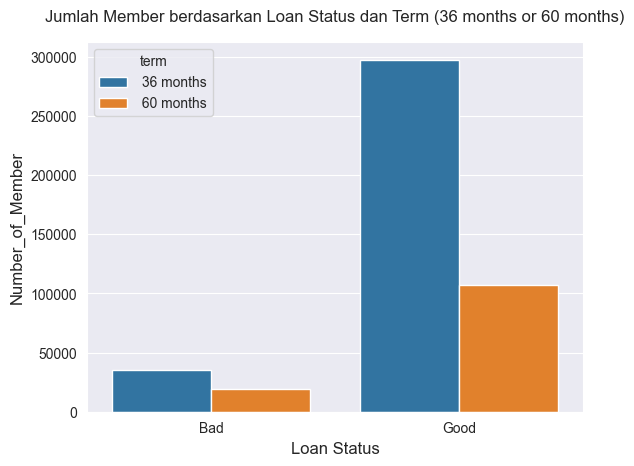

In [67]:
# make countplot loan_status based on term
sns.countplot(x="loan_status", data=df , hue='term')

plt.title('Jumlah Member berdasarkan Loan Status dan Term (36 months or 60 months)', pad=15,fontsize=12)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Number_of_Member', fontsize=12)
plt.xticks(rotation=0)
# Change the x-axis tick labels
plt.gca().set_xticklabels(['Bad', 'Good'])

plt.show()

`Mayoritas pinjaman yang tercatat dalam dataset memiliki jangka waktu pinjaman selama 36 bulan atau 3 tahun.`

##### Purpose

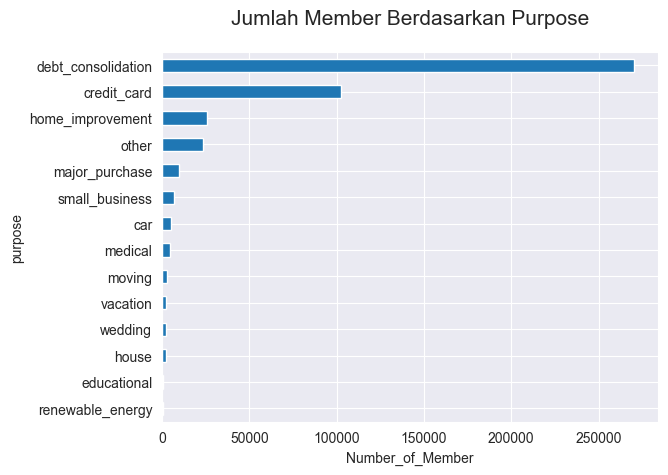

In [68]:
# Menghitung Jumlah member berdasarkan purpose
df.groupby('purpose')['purpose'].count().sort_values().plot(kind='barh')
plt.title('Jumlah Member Berdasarkan Purpose', pad=20, fontsize=15)
plt.xlabel('Number_of_Member')
plt.show()

`Purpose peminjaman paling banyak adalah debt_consolidation dengat total 270.567 members kemudian credit_Card dengan total 102.591 members.`

### Model Machine Learning

#### Undersampling class 1

In [69]:
# Mengambil indeks dari data point dengan label 1
indices_class_1 = df[df['loan_status'] == 1].index

# Mengambil sampel acak sebanyak 150.000 data point dari kelas 1
undersampled_indices = np.random.choice(indices_class_1, size=150000, replace=False)

# Menggabungkan indeks sampel yang diambil dengan indeks dari kelas 0
indices_class_0 = df[df['loan_status'] == 0].index
undersampled_indices = np.concatenate((undersampled_indices, indices_class_0))

# Membuat DataFrame baru dengan data point yang telah diundersampling
undersampled_df = df.loc[undersampled_indices]

In [70]:
undersampled_df['loan_status'].value_counts()

1    150000
0     54664
Name: loan_status, dtype: int64

In [71]:
undersampled_df.shape

(204664, 21)

#### Training Model

#### Mencari Model Terbaik

In [74]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Pisahkan fitur (X) dan target (y)
X = undersampled_df.drop('loan_status', axis=1)
y = undersampled_df['loan_status']

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan transformer untuk fitur numerik dan non-numerik
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Tentukan kolom yang termasuk fitur numerik dan non-numerik
# Mengambil kolom dengan tipe objek dari DataFrame
kolom_nonobjek = undersampled_df.select_dtypes(exclude=['object']).columns

# Menentukan kolom-kolom non-objek yang akan di-scaling (kecuali kolom target)
kolom_nonobjek = [col for col in kolom_nonobjek if col != 'loan_status']

# Mengambil kolom dengan tipe objek dari DataFrame
kolom_objek = undersampled_df.select_dtypes(include=['object']).columns

# Buat ColumnTransformer dengan transformer yang sesuai untuk masing-masing kolom
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, kolom_nonobjek),
        ('categorical', categorical_transformer, kolom_objek)
    ])

classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    # Buat pipeline dengan preprocessor, SMOTE, dan model
    pipeline = ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTE()),
        ('model', classifier)
    ])

    # Perform cross-validation and calculate multiple metrics
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    scoring = {'accuracy': 'accuracy', 'f1_macro': 'f1_macro', 'recall_macro': 'recall_macro', 'precision_macro': 'precision_macro'}
    results = cross_validate(pipeline, X, y, cv=kfold, scoring=scoring)

    # Extract the mean scores for each metric
    accuracy_mean = results['test_accuracy'].mean()
    f1_mean = results['test_f1_macro'].mean()
    recall_mean = results['test_recall_macro'].mean()
    precision_mean = results['test_precision_macro'].mean()

    # Display the results
    print(classifier)
    print("Accuracy: {:.2f}".format(accuracy_mean))
    print("F1-score: {:.2f}".format(f1_mean))
    print("Recall: {:.2f}".format(recall_mean))
    print("Precision: {:.2f}".format(precision_mean))
   
    print('---'*20)

c:\Users\ASUS\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression()
Accuracy: 0.62
F1-score: 0.59
Recall: 0.63
Precision: 0.60
------------------------------------------------------------
DecisionTreeClassifier()
Accuracy: 0.80
F1-score: 0.75
Recall: 0.76
Precision: 0.75
------------------------------------------------------------
RandomForestClassifier()
Accuracy: 0.85
F1-score: 0.80
Recall: 0.78
Precision: 0.83
------------------------------------------------------------
AdaBoostClassifier()
Accuracy: 0.81
F1-score: 0.78
Recall: 0.81
Precision: 0.77
------------------------------------------------------------
GradientBoostingClassifier()
Accuracy: 0.84
F1-score: 0.80
Recall: 0.81
Precision: 0.80
------------------------------------------------------------


Model yang akan dievaluasi selanjutnya menggunakan algoritma `Random Forest Classifier`

#### Membangun Machine Learning model 

##### Random Forest Classifier dengan k = 40

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# Buat pipeline dengan preprocessor, SMOTE, dan model
pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE()),
    ('selector', SelectKBest(score_func=f_classif, k=40)),
    ('model', RandomForestClassifier())
])

# Latih model menggunakan pipeline
pipeline.fit(X_train, y_train)

# Evaluasi model
accuracy = pipeline.score(X_test, y_test)

print(f'accuracy model:',accuracy)

# Evaluasi model menggunakan data uji
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluasi dengan classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Evaluasi dengan ROC AUC
auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", auc)


accuracy model: 0.8478489238511714
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.63      0.69     10991
           1       0.87      0.93      0.90     29942

    accuracy                           0.85     40933
   macro avg       0.82      0.78      0.79     40933
weighted avg       0.84      0.85      0.84     40933

ROC AUC: 0.7775164988404082


Accuracy model adalah 0.85

##### Confusion Matrix

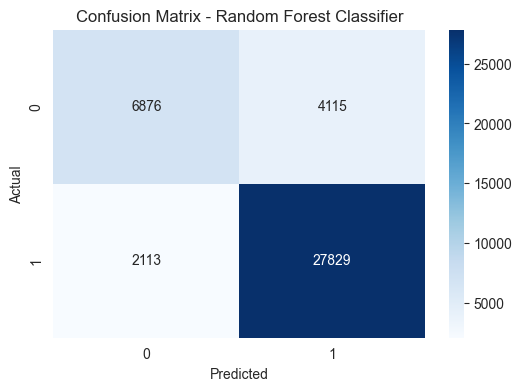

In [105]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

Model dapat memprediksi 34751 data secara benar. Sedangkan 6182 data salah prediksi.

##### Melihat Feature Importance

In [106]:
# Dapatkan transformasi OneHotEncoder dari preprocessor
transformer = pipeline.named_steps['preprocess'].named_transformers_['categorical']

# Dapatkan nama kolom setelah encoding
encoded_columns = transformer.get_feature_names_out(input_features=kolom_objek)

# Gabungkan nama kolom numerik dan nama kolom encoded
all_columns = kolom_nonobjek + list(encoded_columns)

In [107]:
# Mendapatkan masker fitur yang dipilih (True) atau tidak dipilih (False)
selected_features_mask = pipeline.named_steps.selector.get_support()

# Mencetak nama fitur yang dipilih
selected_features = [all_columns[i] for i, selected in enumerate(selected_features_mask) if selected]

print(selected_features)

['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'collections_12_mths_ex_med', 'month_difference', 'term_ 36 months', 'term_ 60 months', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'emp_length_10+ years', 'emp_length_3 years', 'emp_length_7 years', 'emp_length_< 1 year', 'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_moving', 'purpose_other', 'purpose_small_business', 'initial_list_status_f', 'initial_list_status_w']


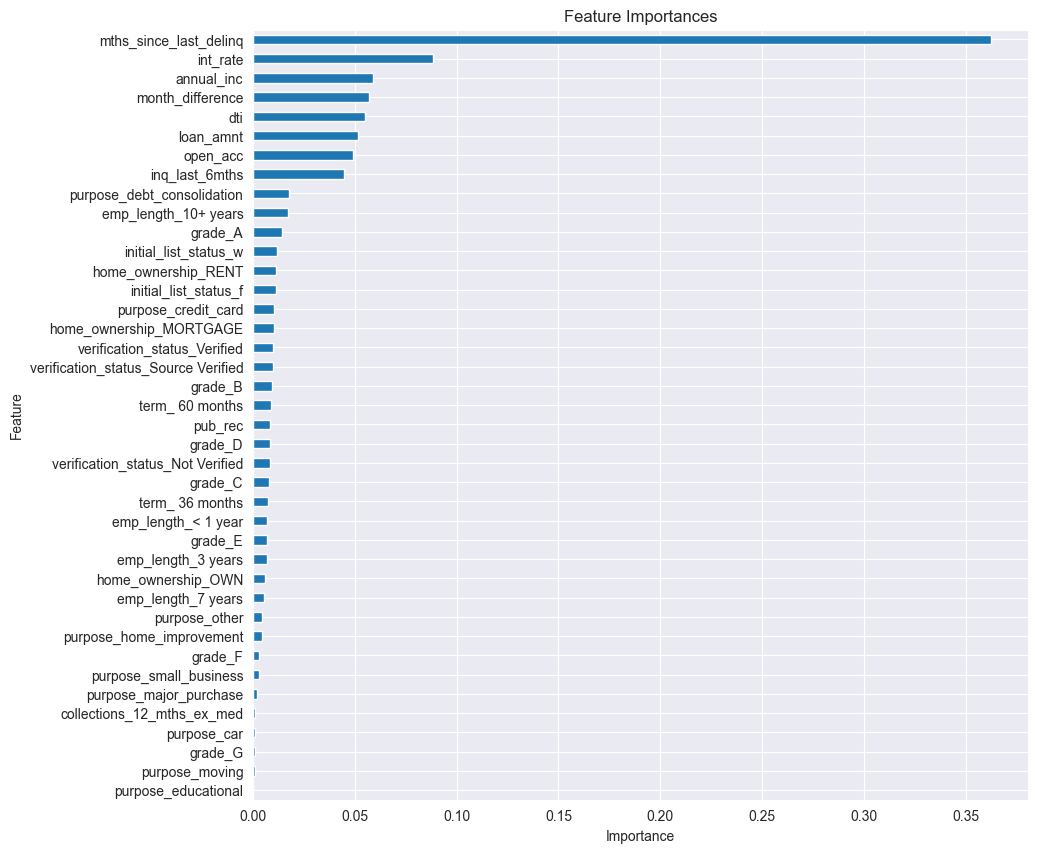

In [108]:
# Dapatkan objek model dari pipeline
model = pipeline.named_steps['model']

# Dapatkan fitur importances
importances = model.feature_importances_

# Lakukan pengindeksan pada fitur importances dengan nama kolom
feature_importances = pd.Series(importances, index=selected_features)

# Urutkan fitur importances secara menurun
feature_importances_sorted = feature_importances.sort_values(ascending=True)

# Tampilkan fitur importances dalam bentuk bar chart
plt.figure(figsize=(10, 10))
feature_importances_sorted.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Dengan menggunakan Random Forest Classifier, feature mths_since_last_delinq menjadi feature yang paling tinggi skornya yaitu mencapai 0.362748.

### Conclusion

1. Algoritma terbaik untuk prediksi risiko kredit adalah Random Forest, dengan akurasi 0.85.
2. Feature yang digunakan untuk membangun model adalah 30 dari 54.
3. Dari nilai presisi, recall dan f1-score bahwa model mampu dengan baik memprediksi "good" credit risk dari pada "bad" credit risk.